# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [4]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=40_000 # size of the population to be simulated
size1=40_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli_start='best/v2_malli_base_dev'
perusmalli='best/v2_malli_base_dev'
perusresults='results/v2_malli_base_dev_stoch'
prefmalli='best/v2_malli_perus_prefnoise'
prefresults='results/v2_perus_results_prefnoise'
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [5]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=False,cont=True,start_from=perusmalli_start,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage,learning_rate=0.05)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

train...
phase 1
batch 9 learning rate 0.0125 scaled 0.037500000000000006




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.998    |
| fps                | 2902     |
| nupdates           | 1        |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0177  |
| total_timesteps    | 21816    |
| value_loss         | 0.

---------------------------------
| explained_variance | 0.997    |
| fps                | 2778     |
| nupdates           | 60       |
| policy_entropy     | 0.984    |
| policy_loss        | -0.0379  |
| total_timesteps    | 1308960  |
| value_loss         | 0.0405   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2823     |
| nupdates           | 70       |
| policy_entropy     | 0.982    |
| policy_loss        | 0.0085   |
| total_timesteps    | 1527120  |
| value_loss         | 0.0352   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2857     |
| nupdates           | 80       |
| policy_entropy     | 0.979    |
| policy_loss        | -0.0137  |
| total_timesteps    | 1745280  |
| value_loss         | 0.0318   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2864     |
| nupdates           | 330      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.00566 |
| total_timesteps    | 7199280  |
| value_loss         | 0.0223   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2864     |
| nupdates           | 340      |
| policy_entropy     | 1        |
| policy_loss        | -0.0179  |
| total_timesteps    | 7417440  |
| value_loss         | 0.019    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2864     |
| nupdates           | 350      |
| policy_entropy     | 0.977    |
| policy_loss        | -0.0101  |
| total_timesteps    | 7635600  |
| value_loss         | 0.0218   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2915     |
| nupdates           | 600      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0157  |
| total_timesteps    | 13089600 |
| value_loss         | 0.0205   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2916     |
| nupdates           | 610      |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0189  |
| total_timesteps    | 13307760 |
| value_loss         | 0.025    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2919     |
| nupdates           | 620      |
| policy_entropy     | 0.981    |
| policy_loss        | -0.0142  |
| total_timesteps    | 13525920 |
| value_loss         | 0.0252   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2932     |
| nupdates           | 870      |
| policy_entropy     | 0.976    |
| policy_loss        | -0.00905 |
| total_timesteps    | 18979920 |
| value_loss         | 0.022    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2933     |
| nupdates           | 880      |
| policy_entropy     | 0.981    |
| policy_loss        | -0.00918 |
| total_timesteps    | 19198080 |
| value_loss         | 0.0176   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2933     |
| nupdates           | 890      |
| policy_entropy     | 1        |
| policy_loss        | -0.00821 |
| total_timesteps    | 19416240 |
| value_loss         | 0.0204   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2917     |
| nupdates           | 1140     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.01    |
| total_timesteps    | 24870240 |
| value_loss         | 0.0187   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2916     |
| nupdates           | 1150     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0158  |
| total_timesteps    | 25088400 |
| value_loss         | 0.0193   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2914     |
| nupdates           | 1160     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.013   |
| total_timesteps    | 25306560 |
| value_loss         | 0.0228   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2894     |
| nupdates           | 1410     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.00848 |
| total_timesteps    | 30760560 |
| value_loss         | 0.0214   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2895     |
| nupdates           | 1420     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00712 |
| total_timesteps    | 30978720 |
| value_loss         | 0.0172   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2894     |
| nupdates           | 1430     |
| policy_entropy     | 0.978    |
| policy_loss        | -0.0134  |
| total_timesteps    | 31196880 |
| value_loss         | 0.0229   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 927      |
| nupdates           | 1680     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0094  |
| total_timesteps    | 36650880 |
| value_loss         | 0.0207   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 931      |
| nupdates           | 1690     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0214  |
| total_timesteps    | 36869040 |
| value_loss         | 0.0248   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 924      |
| nupdates           | 1700     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.00365 |
| total_timesteps    | 37087200 |
| value_loss         | 0.0187   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

Widget Javascript not detected.  It may not be installed or enabled properly.


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


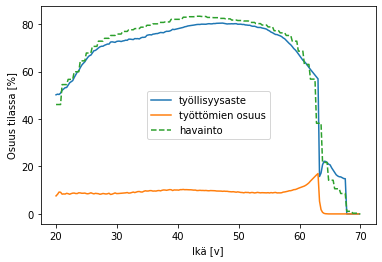

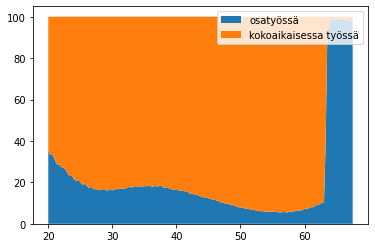

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


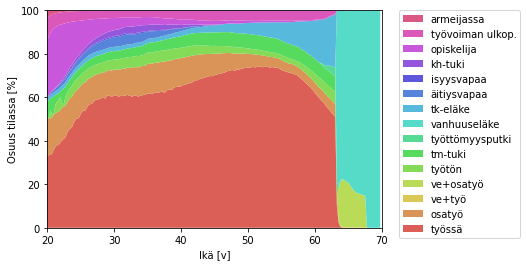

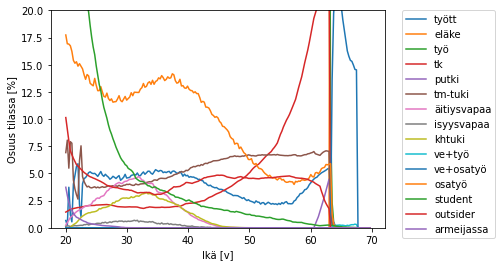

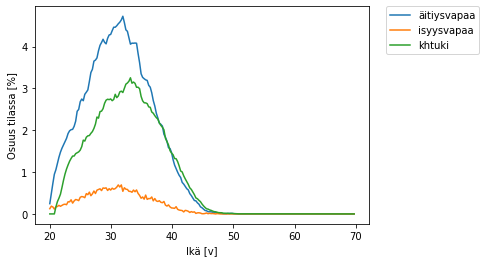

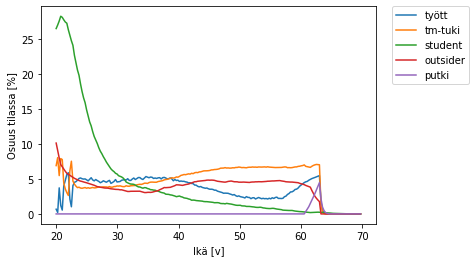

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


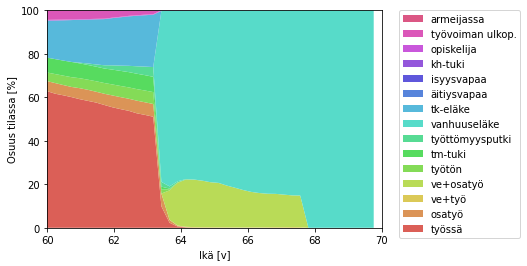

Rahavirrat skaalattuna väestötasolle
+------------------+----------------------+----------------------+----------------------+
|                  |                  e/v |              toteuma |                  ero |
|------------------+----------------------+----------------------+----------------------|
| palkkatulo       | 83,952,546,815.21    | 89,134,200,000.00    | -5,181,653,184.79    |
| etuusmeno        | 43,570,415,418.11    | 36,945,147,749.00    |  6,625,267,669.11    |
| verot+maksut     | 29,324,215,638.69    | 30,763,000,000.00    | -1,438,784,361.31    |
| muut tulot       | 14,246,199,779.41    |  6,182,147,749.00    |  8,064,052,030.41    |
| valtionvero      |  2,895,884,328.28    |  5,542,000,000.00    | -2,646,115,671.72    |
| kunnallisvero    | 17,896,547,057.10    | 18,991,000,000.00    | -1,094,452,942.90    |
| ptel             |  5,230,349,766.97    |  5,560,000,000.00    |   -329,650,233.03    |
| tyotvakmaksu     |  1,595,098,389.49    |  1,693,549,800.00  

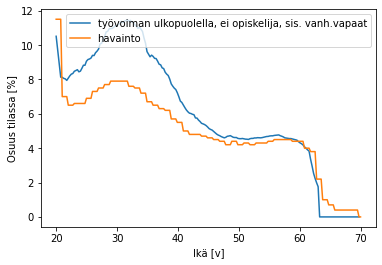

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.85 |      0.12 |       0.03 |      0.00 |        0.00 |
| 30-39 |     0.79 |      0.14 |       0.07 |      0.00 |        0.00 |
| 40-49 |     0.76 |      0.15 |       0.09 |      0.00 |        0.00 |
| 50-59 |     0.77 |      0.15 |       0.08 |      0.00 |        0.00 |
| 60-65 |     0.65 |      0.11 |       0.08 |      0.06 |        0.10 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.86 |      0.11 |       0.03 |      0.00 |        0.00 |
| 30-39 |     0.83 |      0.09 |       0.07 |      0.00 |        0.00 |
| 40-49 |     0.82 |      0.09 |       0.09 |      0.00 |        0.00 |
| 50-59 |     0.84 |      0.08 |       0.07 |      0.01 |        0.00 |
| 60-65 |     0.47 |      0.20 |       0.15 |      0.14 |        0.04 |
+-------+----------+-----------+------------+-----------+-------------+


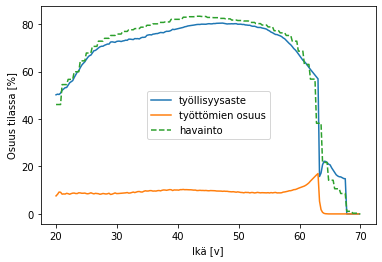

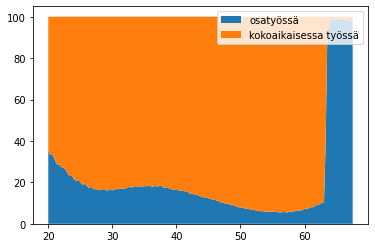

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


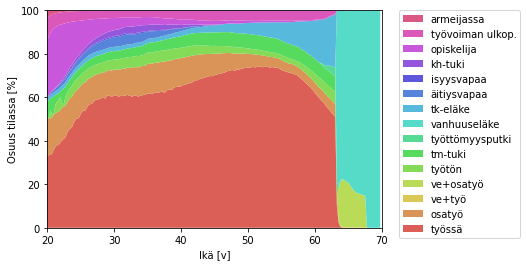

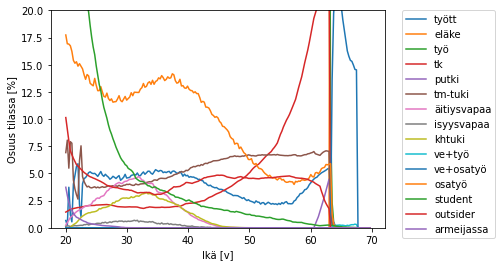

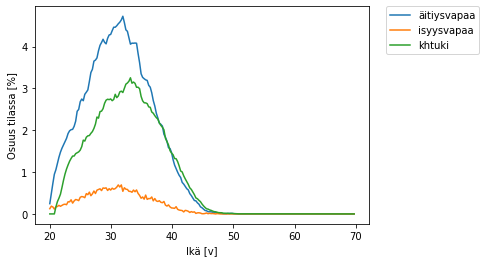

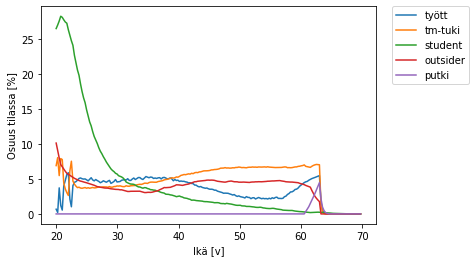

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


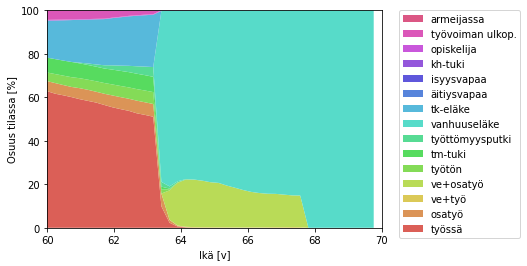

Lisäpäivillä on 4912 henkilöä


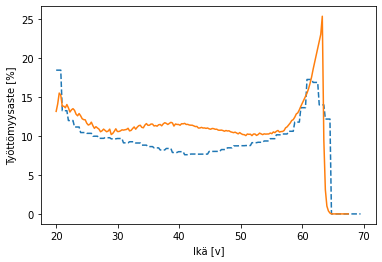

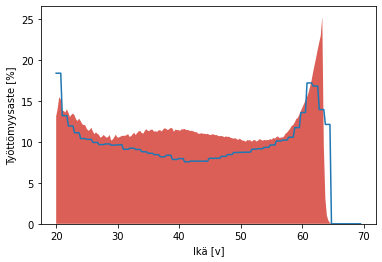

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


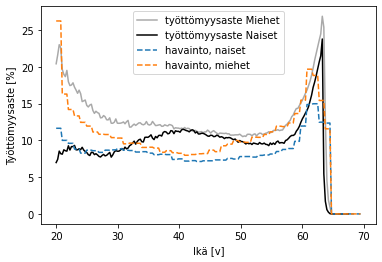

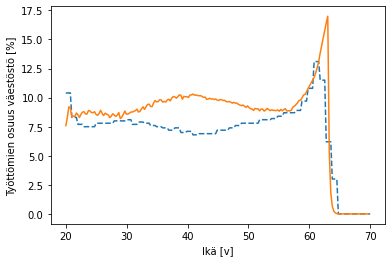

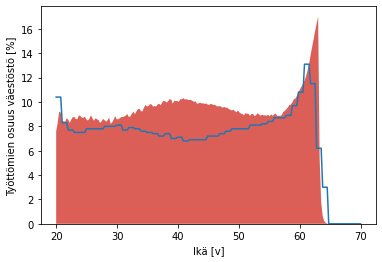

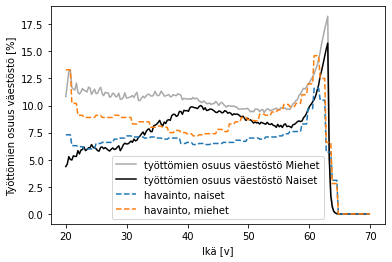

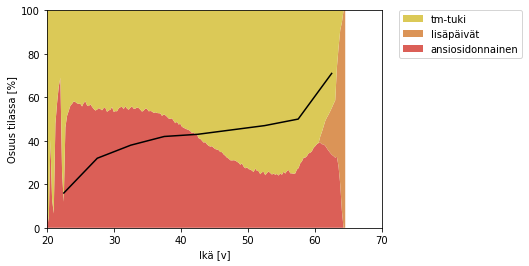

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


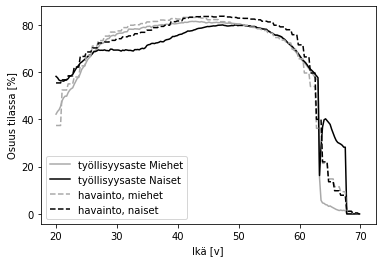

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


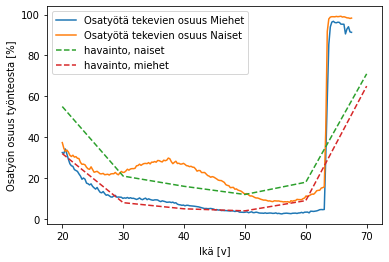

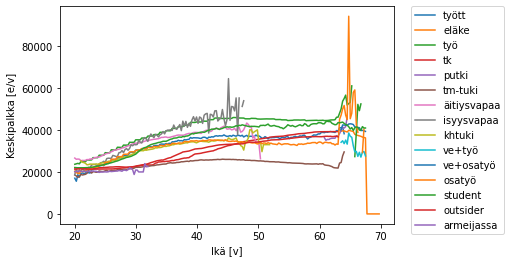

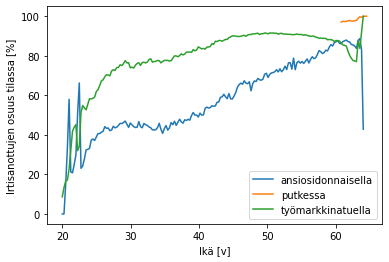

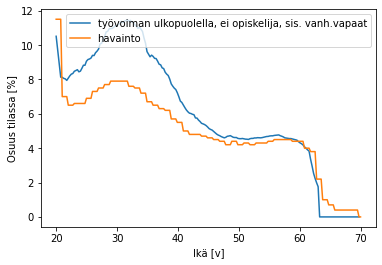

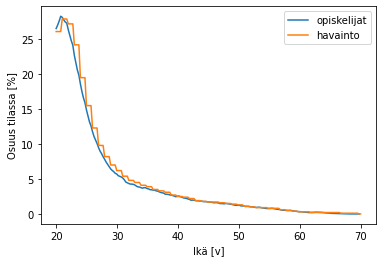

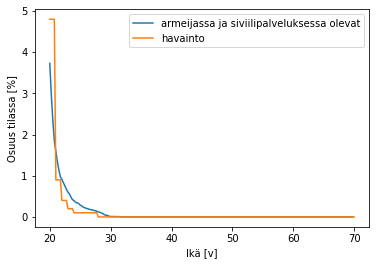

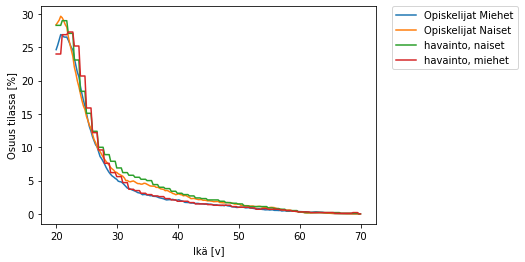

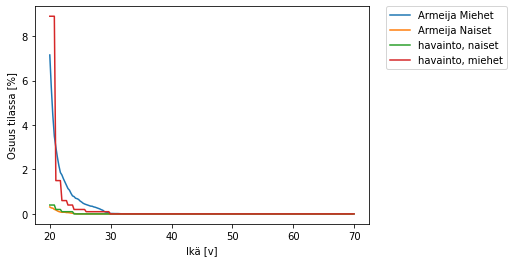

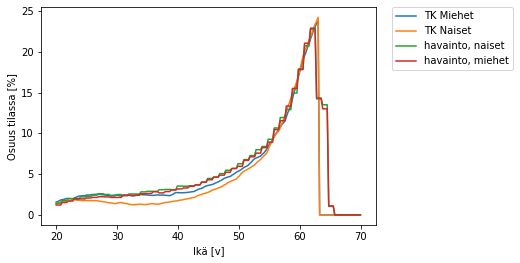

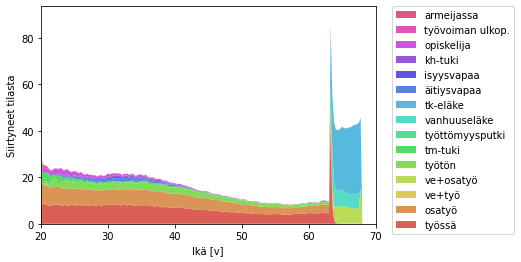

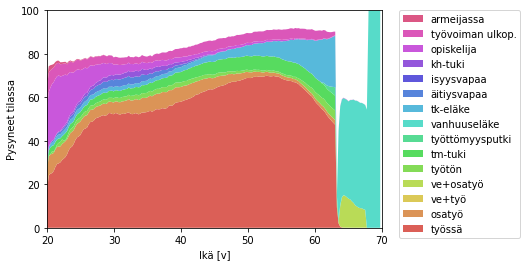

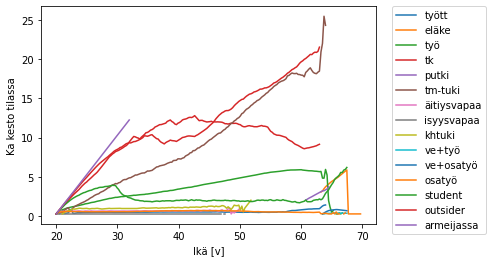

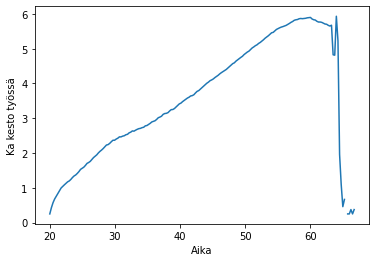

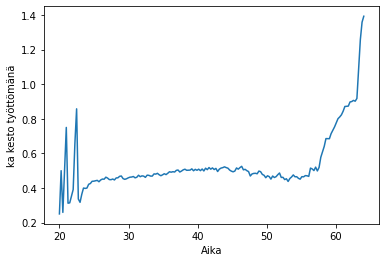

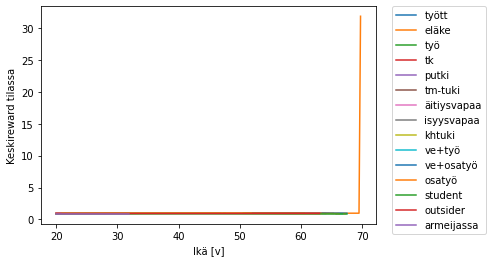

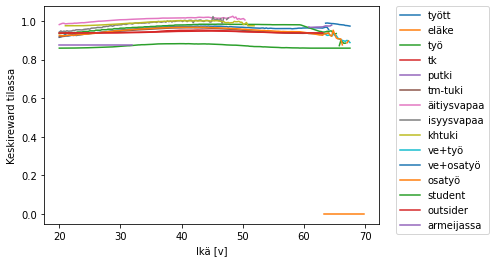

No handles with labels found to put in legend.


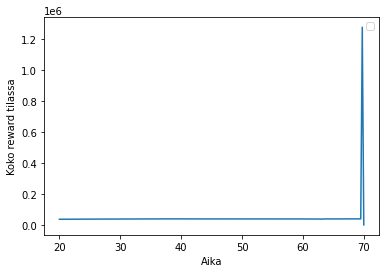

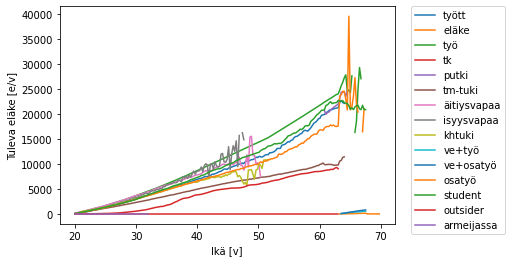

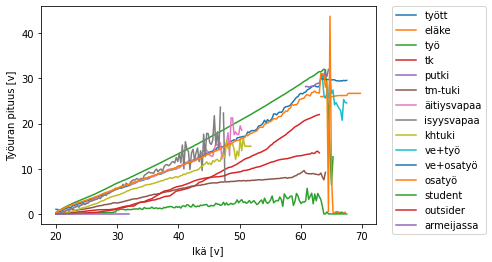

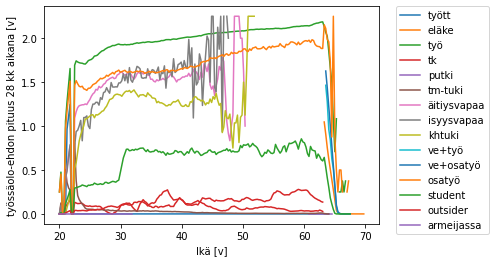

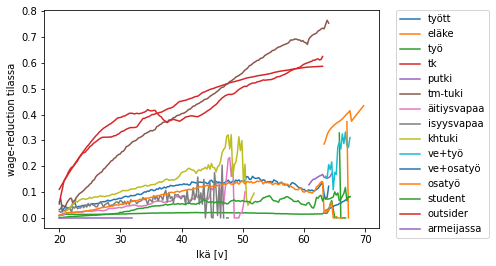

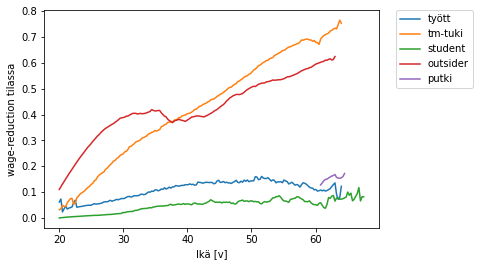

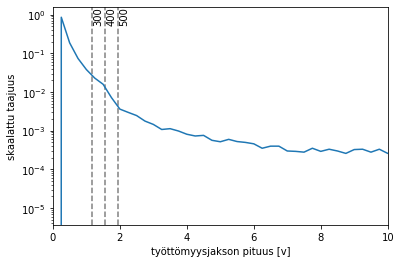

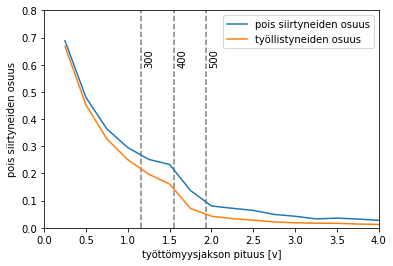

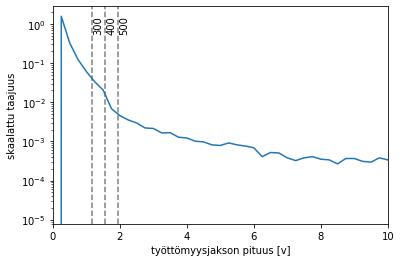

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


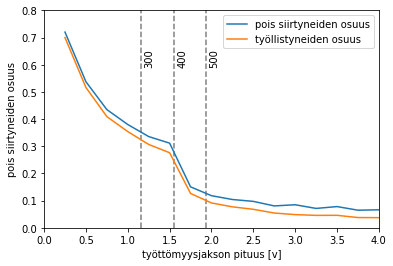

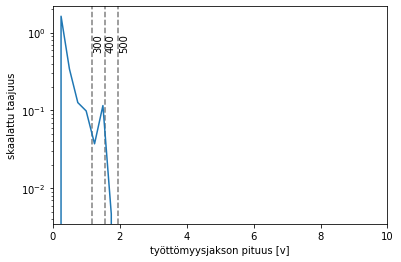

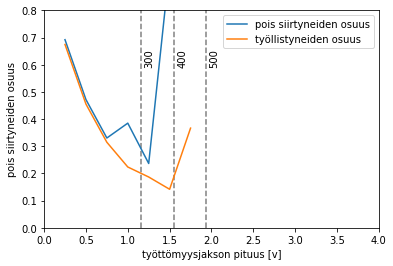

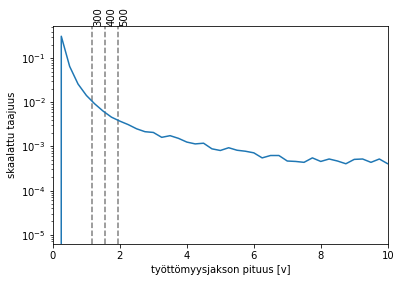

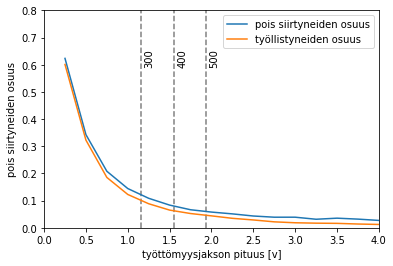

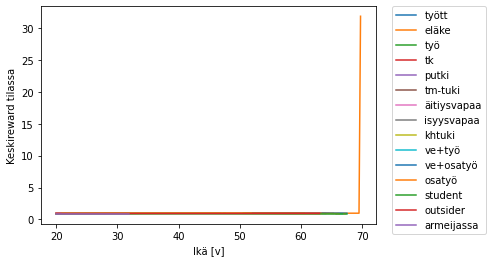

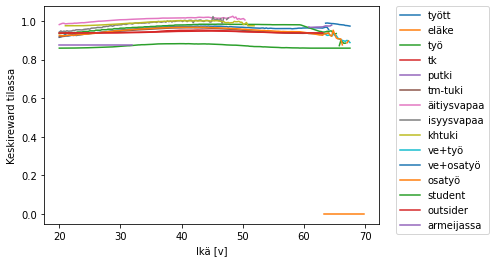

No handles with labels found to put in legend.


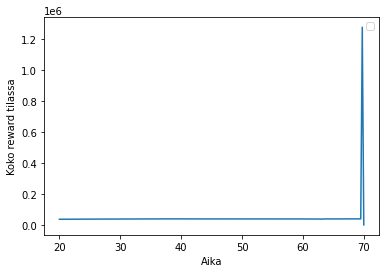

In [6]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)

cc1.render(load=perusresults,figname='v2_')